## Name: Nguyen Minh Huy Duong

### Assignment 2

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('cluster_data1.csv')
dataset.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


### Question 1

In [3]:
# Extracting features
X = dataset[['X1', 'X2', 'X3', 'X4']].values

In [4]:
# Step 1 Choose the number of cluster k
K = 3
np.random.seed(123)

In [5]:
# Step 2 Select k random points from the data as centroids
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
centroids

array([[5.2, 3.5, 1.5, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [7.2, 3.6, 6.1, 2.5]])

In [6]:
def distance(X, centroids):
    return np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))

In [7]:
def plot(X, centroids, clusters, title):
    plt.figure()
    for k in range(len(centroids)):
        plt.scatter(X[clusters == k, 0], X[clusters == k, 1], label=f'Cluster {k}')
        plt.scatter(centroids[k, 0], centroids[k, 1], s=100, c='black', marker='x', label=f'Centroid {k}')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    # plt.legend()
    plt.show()

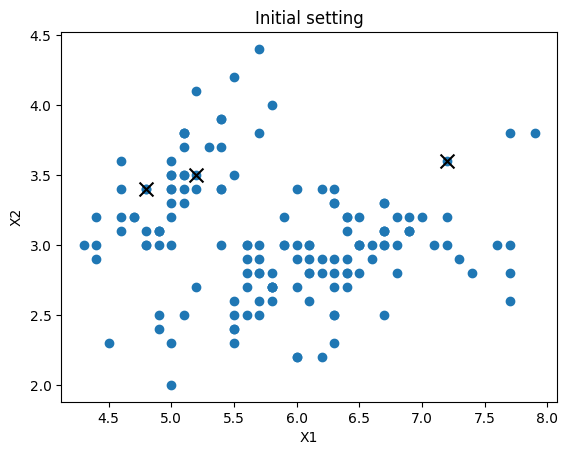

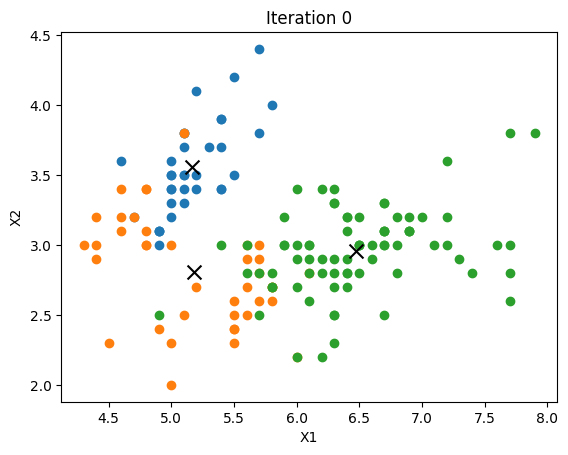

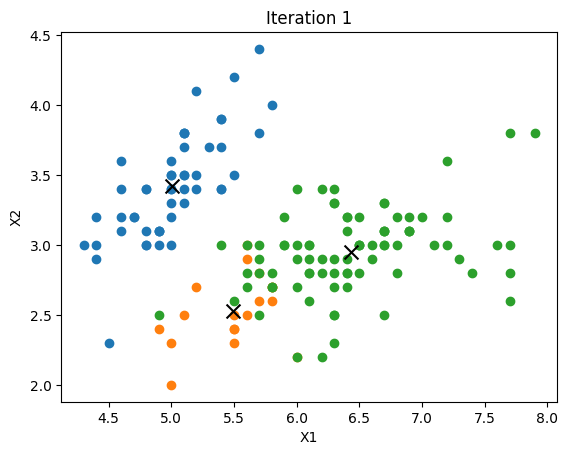

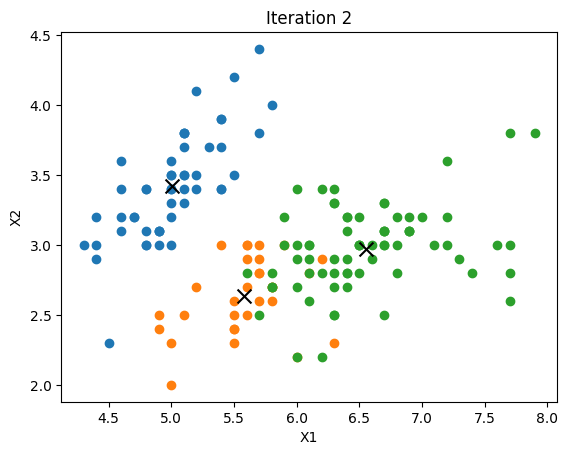

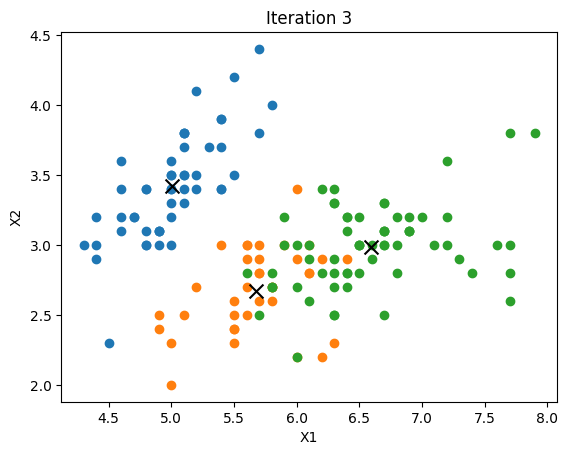

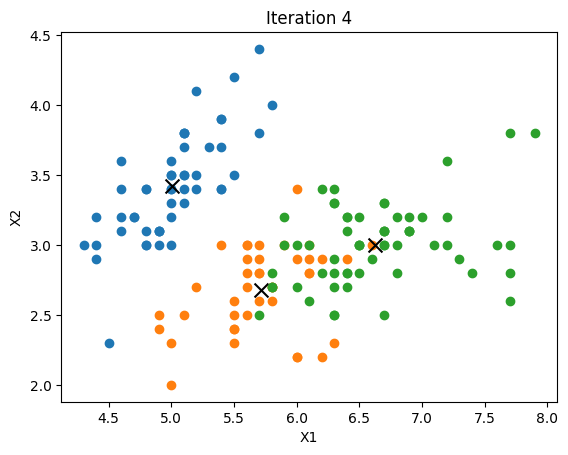

In [8]:
# Initialize cluster
clusters = np.zeros(len(X), dtype="int32")
plot(X, centroids, clusters, "Initial setting")

# Step 6: Repeat steps 3, 4, and 5
for i in range(5):
    # Step 3: Calculate distance all the points from the centroids
    distances = distance(X, centroids)

    # Step 4: Assign all the points to the closet cluster centroid
    clusters = np.argmin(distances, axis=1)

    # Step 5: Recompute the centroids of newly formed clusters
    new_centroids = np.array([X[clusters==k].mean(axis=0) for k in range(K)])

    plot(X, new_centroids, clusters, f'Iteration {i}')

    # plt.figure()
    # for k in range(K):
    #     plt.scatter(X[clusters == k, 0], X[clusters == k, 1], label=f'Cluster {k}')
    #     plt.scatter(new_centroids[k, 0], new_centroids[k, 1], s=300, c='black', marker='x', label=f'Centroid {k}')
    
    # plt.title(f'Iteration {i}')
    # plt.xlabel('X1')
    # plt.ylabel('X2')
    # # plt.legend()
    # plt.show()

    centroids = new_centroids


### Question 2

In [9]:
# Put random seed as "123"
np.random.seed(123)

,X1,X2,X3,X4
72,5.2,3.5,1.5,0.2
112,4.8,3.4,1.9,0.2
132,7.2,3.6,6.1,2.5
88,5.7,2.9,4.2,1.3
37,7.0,3.2,4.7,1.4


In [15]:
# Step 1: Chosen uniformly at random from the data points
centroids = [X[np.random.choice(X.shape[0])]]
centroids

[array([5.6, 2.5, 3.9, 1.1])]

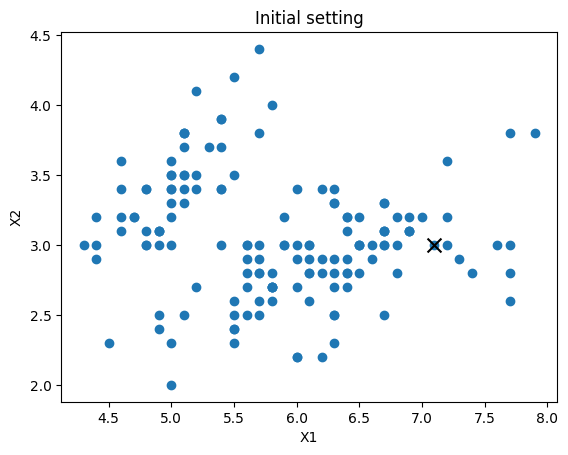

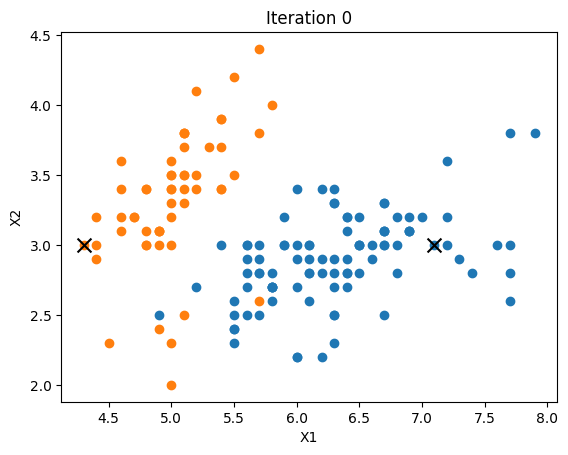

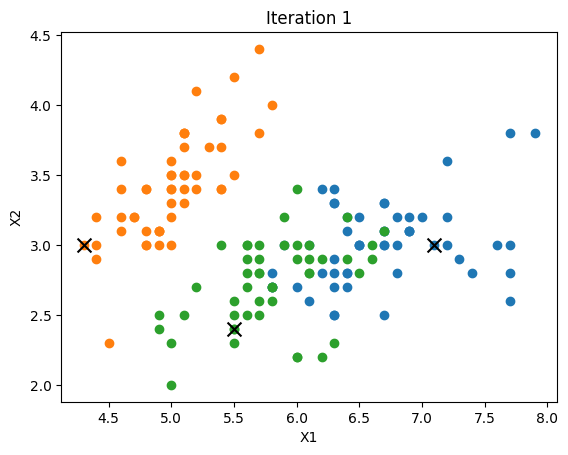

In [11]:
# Initialize cluster
clusters = np.zeros(len(X), dtype="int32")
plot(X, np.array(centroids), clusters, "Initial setting")

for i in range(2):
    distances = np.min([np.linalg.norm(X - centroid, axis=1) for centroid in centroids], axis=0)
    next_centroids = X[np.argmax(distances)]
    # next_centroids
    # centroids = np.append(centroids, new_centroids, axis=0)
    centroids.append(next_centroids)
    distances = distance(X, centroids)
    clusters = np.argmin(distances, axis=1)
    plot(X, np.array(centroids), clusters, f'Iteration {i}')

### Question 3

In [12]:
dataset_2 = pd.read_csv('cluster_data2.csv')
dataset_2.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [13]:
# Extracting features
X_2 = dataset_2[['X1', 'X2', 'X3', 'X4']].values

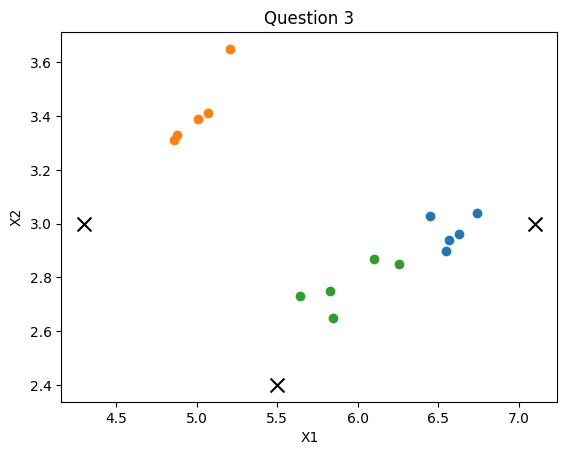

In [14]:
distances = distance(X_2, centroids)
clusters = np.argmin(distances, axis=1)
plot(X_2, np.array(centroids), clusters, f'Question 3')